Importing relevant functionalities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kde
from pandas import DataFrame as df
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [2]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}k'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
     
    return new_tick_format

Preparing plots

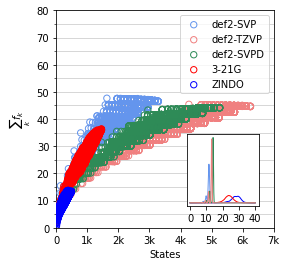

In [6]:
SVPD = pd.read_csv('../csv_files/Nele_Nstates_sumfk_SVPD.csv',header=0)
SVP = pd.read_csv('../csv_files/Nele_Nstates_sumfk_SVP.csv',header=0)
M321G = pd.read_csv('../csv_files/Nele_Nstates_sumfk_321G.csv',header=0)
ZINDO = pd.read_csv('../csv_files/Nele_Nstates_sumfk_ZINDO.csv',header=0)
TZVP = pd.read_csv('../csv_files/Nele_Nstates_sumfk_TZVP.csv',header=0)

ZINDO_dev = abs(ZINDO.sum_f_k[:] - ZINDO.N_ele[:])
ZINDO_dens = kde.gaussian_kde(ZINDO_dev)
M321G_dev = abs(M321G.sum_f_k[:] - M321G.N_ele[:])
M321G_dens = kde.gaussian_kde(M321G_dev)
SVPD_dev = abs(SVPD.sum_f_k[:] - SVPD.N_ele[:])
SVPD_dens = kde.gaussian_kde(SVPD_dev)
SVP_dev = abs(SVP.sum_f_k[:] - SVP.N_ele[:])
SVP_dens = kde.gaussian_kde(SVP_dev)
TZVP_dev = abs(TZVP.sum_f_k[:] - TZVP.N_ele[:])
TZVP_dens = kde.gaussian_kde(TZVP_dev)

x = np.linspace(0,40,500)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()
ax.set_box_aspect(1)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter('{x:.0f}')
#ax.set_yscale('log', basey=2)

ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));
#trk=[]
#ax.set_yticks([0.2, 0.6, 0.8], minor=False)
ax.grid(True, which='both',linewidth=0.5, linestyle='-', axis = 'y',zorder=0)


ax.scatter(SVP.N_states[:],SVP.sum_f_k[:],label='def2-SVP',s=40, facecolors='none', edgecolors='cornflowerblue',zorder=3,linewidths=1.0)
ax.scatter(TZVP.N_states[:],TZVP.sum_f_k[:],label='def2-TZVP',s=40, facecolors='none', edgecolors='lightcoral',zorder=3,linewidths=1.0)
ax.scatter(SVPD.N_states[:],SVPD.sum_f_k[:],label='def2-SVPD',s=40, facecolors='none', edgecolors='seagreen',zorder=3,linewidths=1.0)
ax.scatter(M321G.N_states[:],M321G.sum_f_k[:],label='3-21G',s=40, facecolors='none', edgecolors='red',zorder=3,linewidths=1.0)
ax.scatter(ZINDO.N_states[:],ZINDO.sum_f_k[:],label='ZINDO',s=40, facecolors='none', edgecolors='blue',zorder=3,linewidths=1.0)

ax.set_xlabel('States', fontsize = 10)
ax.set_ylabel('$\\sum_k f_k$',fontsize = 10) 
ax.set_ylim(0,80)
ax.set_xlim(0,7000)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.6,0.1,0.33,0.33])
ax2.set_axes_locator(ip)

plt.yticks([])
ax2.plot(x, ZINDO_dens(x), label='ZINDO',color='blue',zorder=3,linewidth=1.0)
ax2.plot(x, M321G_dens(x), label='3-21G',color='red',zorder=3,linewidth=1.0)
ax2.plot(x, SVP_dens(x), label='def2-SVP',color='cornflowerblue',zorder=3,linewidth=1.0)
ax2.plot(x, SVPD_dens(x), label='def2-SVPD',color='seagreen',zorder=3,linewidth=1.0)
ax2.plot(x, TZVP_dens(x), label='def2-TZVP',color='lightcoral',zorder=3,linewidth=1.0)
ax2.set_xticks(np.arange(min(x),max(x)+1,10.0))
ax.legend()
plt.savefig("sumfk_states.pdf",bbox_inches='tight')
plt.show()

In [4]:
# ZINDO_dev = abs(ZINDO.sum_f_k[:] - ZINDO.N_ele[:])
# ZINDO_dens = kde.gaussian_kde(ZINDO_dev)

# M321G_dev = abs(M321G.sum_f_k[:] - M321G.N_ele[:])
# M321G_dens = kde.gaussian_kde(M321G_dev)

# SVPD_dev = abs(SVPD.sum_f_k[:] - SVPD.N_ele[:])
# SVPD_dens = kde.gaussian_kde(SVPD_dev)

# SVP_dev = abs(SVP.sum_f_k[:] - SVP.N_ele[:])
# SVP_dens = kde.gaussian_kde(SVP_dev)

# TZVP_dev = abs(TZVP.sum_f_k[:] - TZVP.N_ele[:])
# TZVP_dens = kde.gaussian_kde(TZVP_dev)

# x = np.linspace(0,50,500)
# y=SVPD_dens(x)
# plt.yticks([])
# plt.plot(x, ZINDO_dens(x), label='ZINDO',color='blue',zorder=3,linewidth=1.0)
# plt.plot(x, M321G_dens(x), label='3-21G',color='red',zorder=3,linewidth=1.0)
# plt.plot(x, SVP_dens(x), label='def2-SVP',color='cornflowerblue',zorder=3,linewidth=1.0)
# plt.plot(x, SVPD_dens(x), label='def2-SVPD',color='seagreen',zorder=3,linewidth=1.0)
# plt.plot(x, TZVP_dens(x), label='def2-TZVP',color='lightcoral',zorder=3,linewidth=1.0)
# plt.legend()
# plt.savefig("sumfk_dev_nele.pdf",bbox_inches='tight')
# plt.show()